### Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV

import joblib

import warnings
warnings.filterwarnings("ignore")

### importing Dataset

In [5]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [7]:
# converting to dataframe
df = pd.DataFrame(data.data,  columns=data.feature_names)

In [9]:
df['target'] = data.target

In [11]:

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [16]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [18]:
df.shape

(569, 31)

### Data cleaning

In [21]:
df.duplicated().sum()
#no duplicated values

0

In [25]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

##### no missing values found

### Data preprocessing

#### Outlier detection

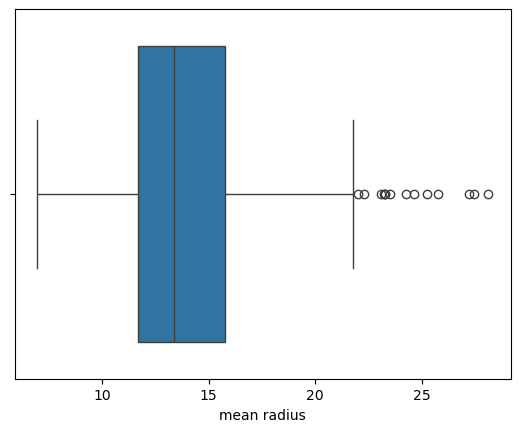

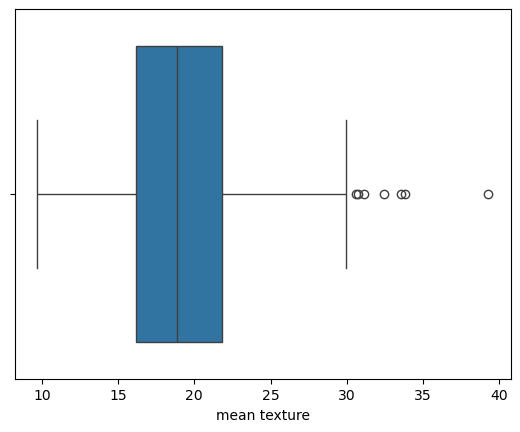

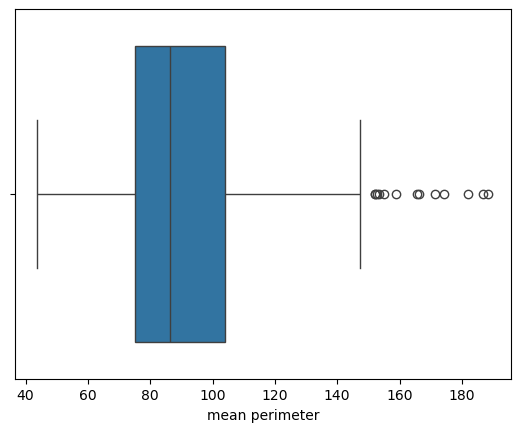

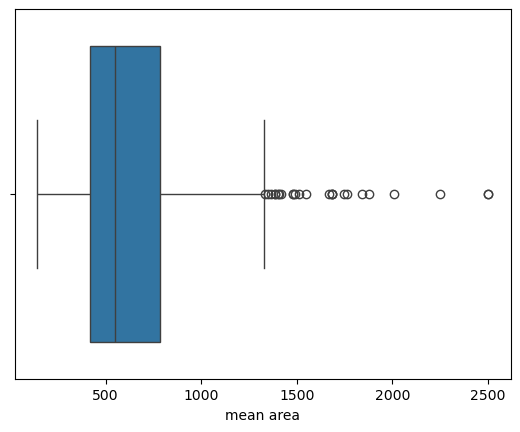

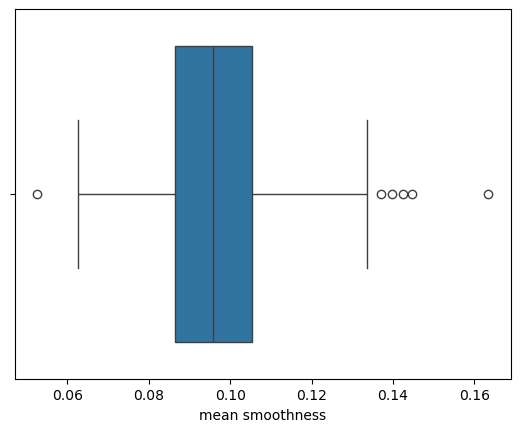

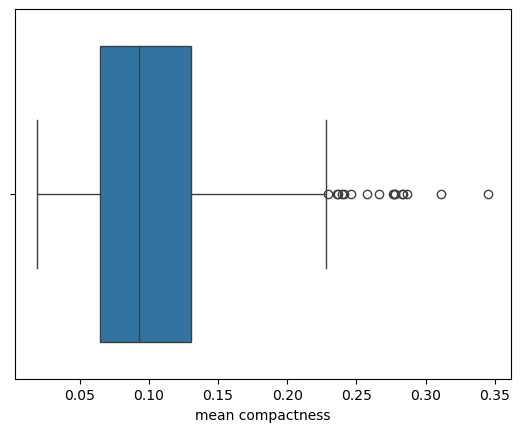

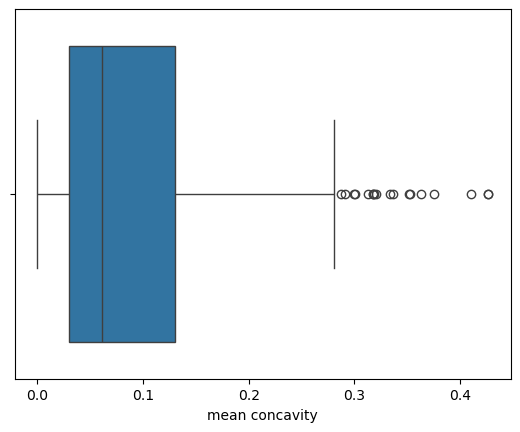

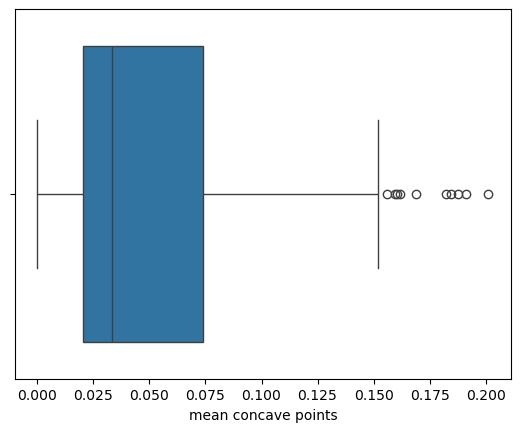

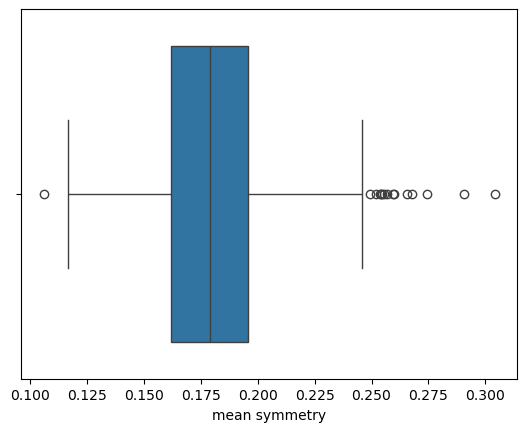

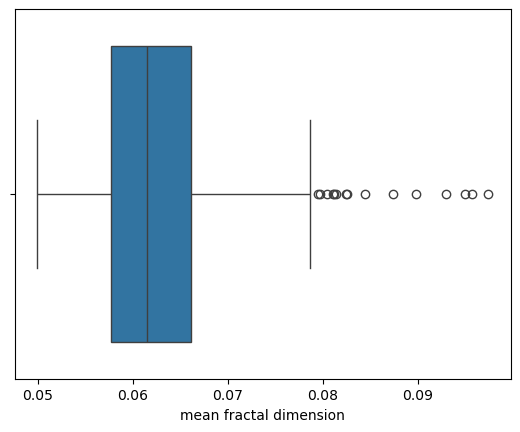

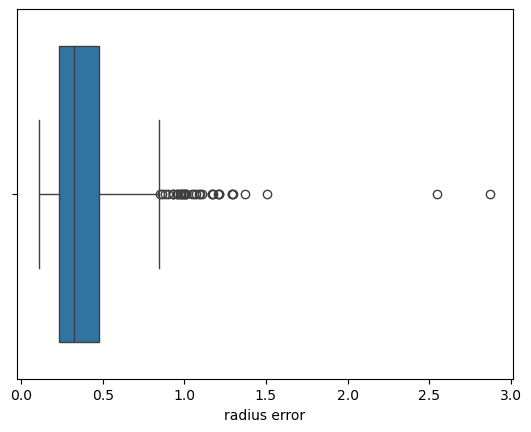

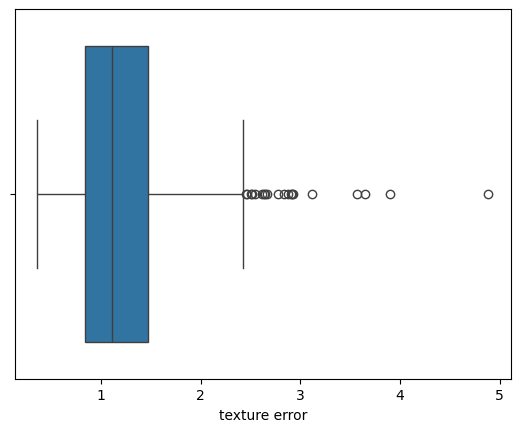

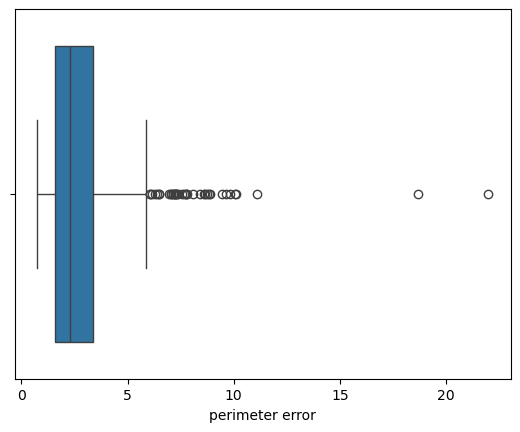

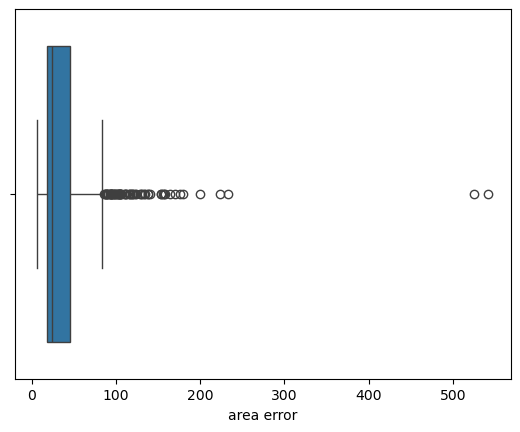

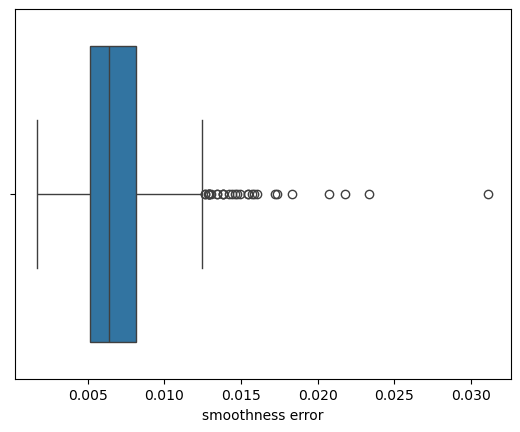

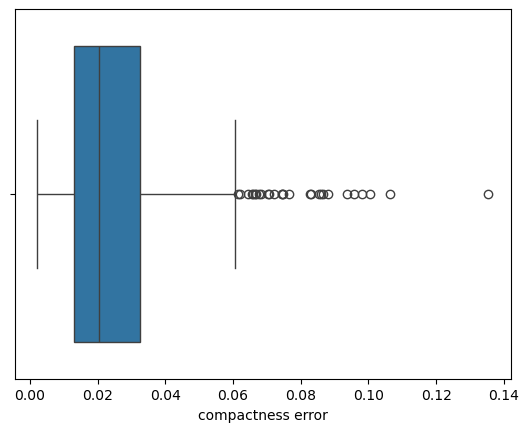

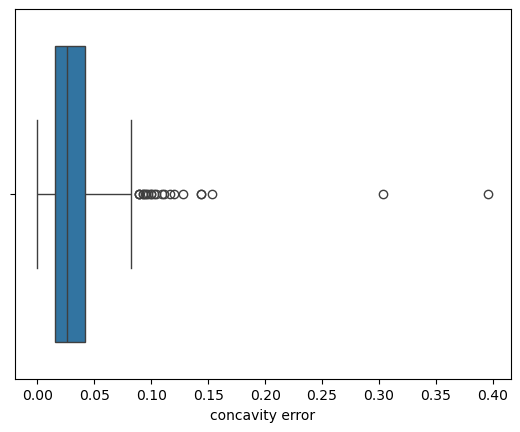

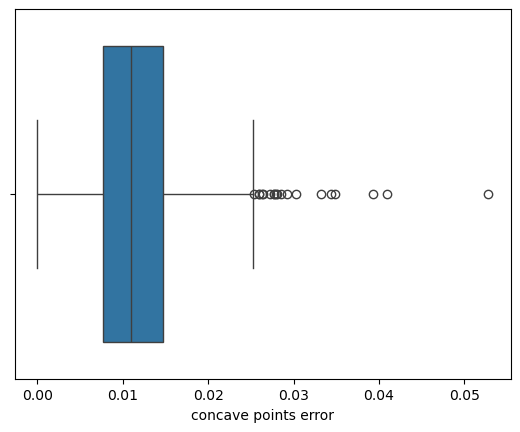

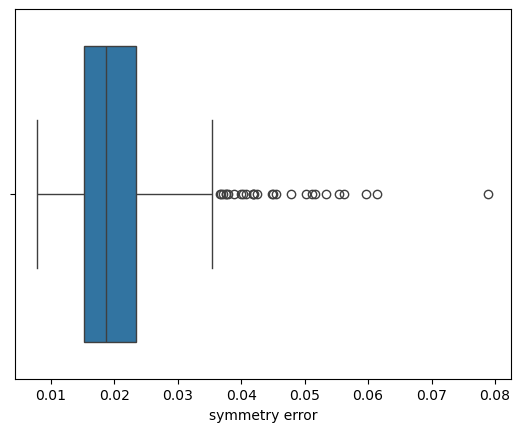

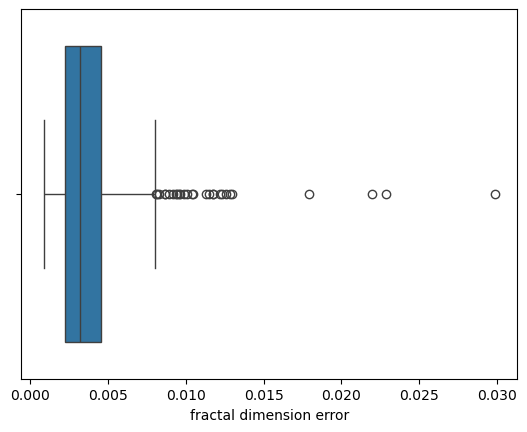

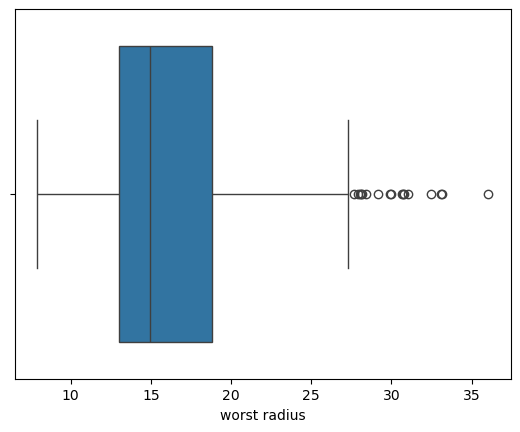

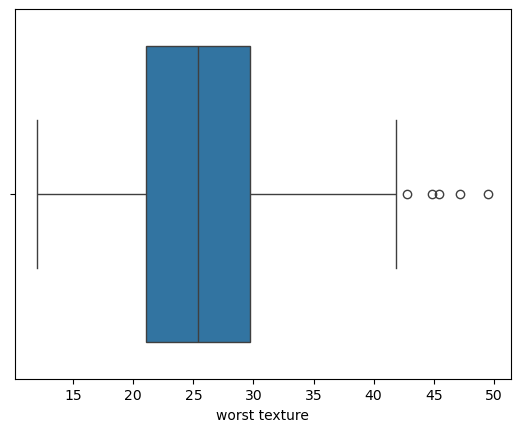

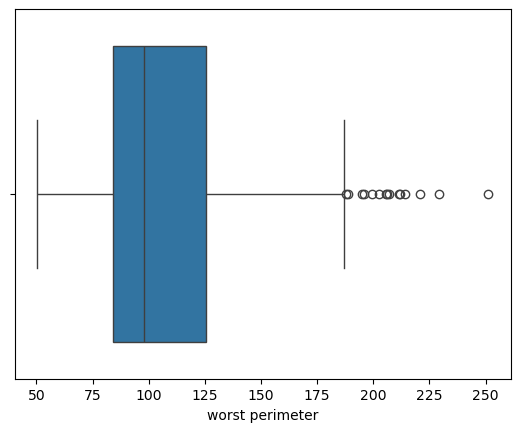

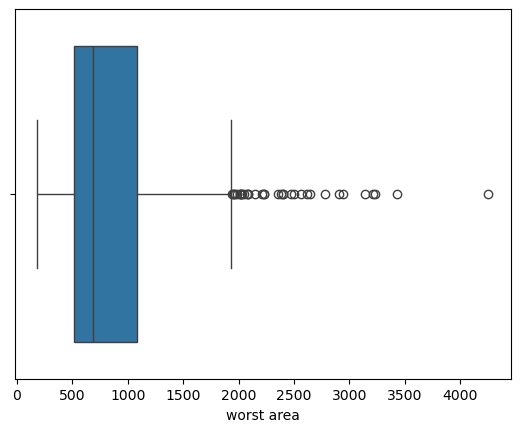

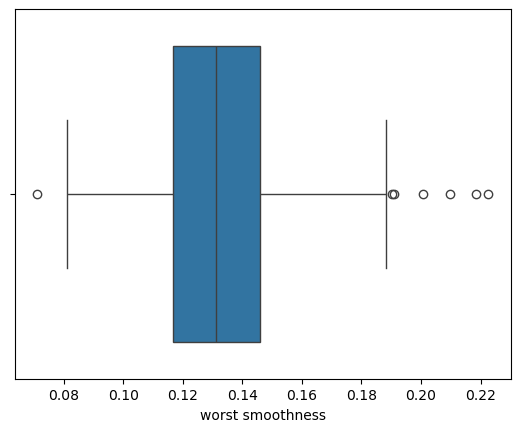

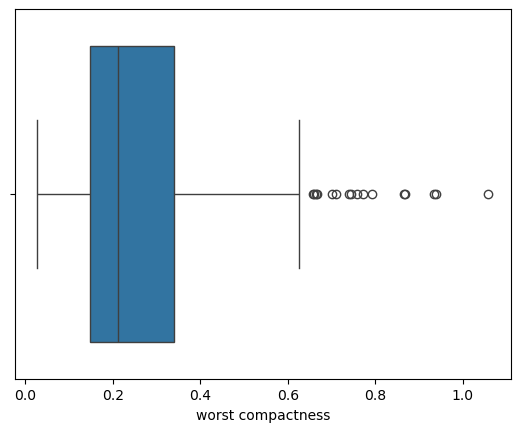

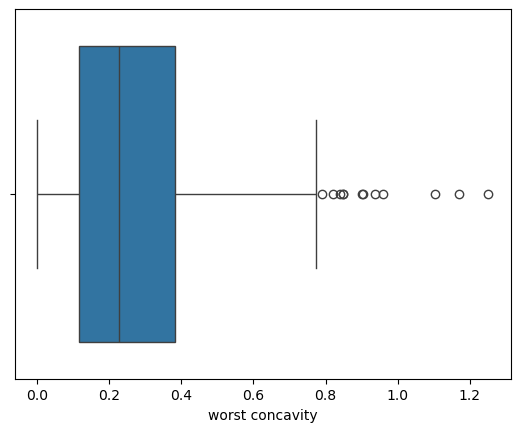

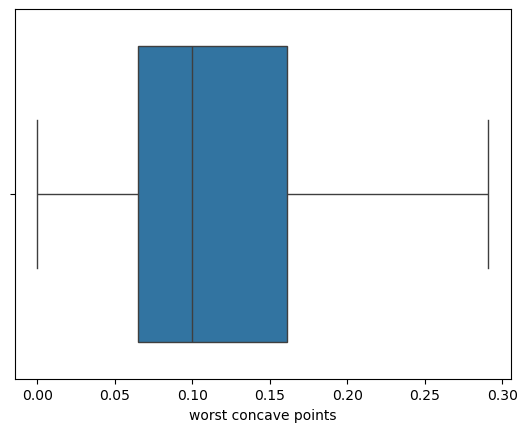

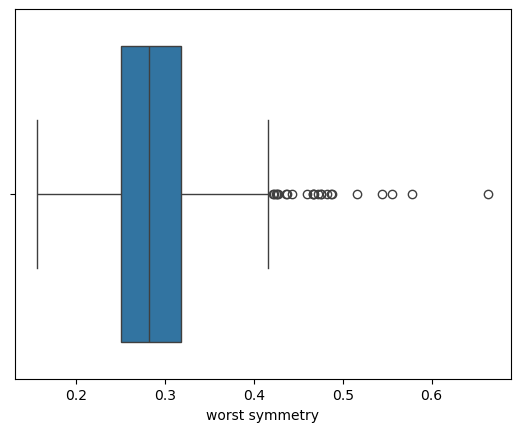

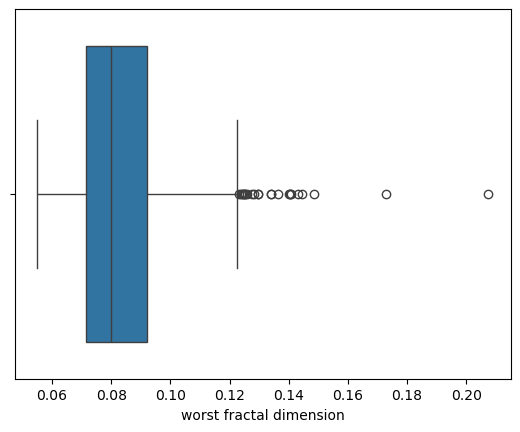

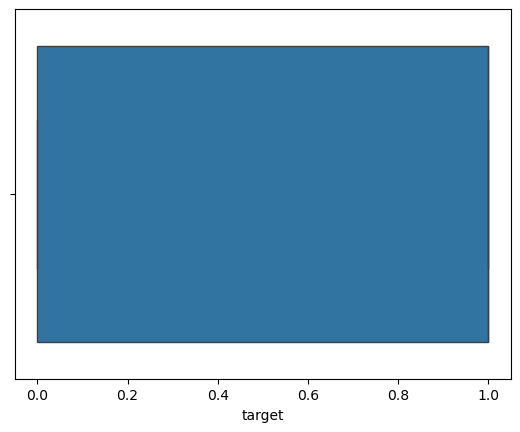

In [32]:
# Visualising outliers in each feature using boxplot 
for i in df.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [40]:
## Using IQR method to find outliers and capping it
columns_to_process = [col for col in df.columns if col != 'target'] #target doesn't have outliers

# Fix outliers using the IQR method
for col in columns_to_process:
    Q1 = df[col].quantile(0.25)  # First quartile
    Q3 = df[col].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1                # Interquartile range
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Clip values outside the bounds
    df[col] = df[col].clip(lower=lower_limit, upper=upper_limit)

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,0.07871,...,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890,0
1,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902,0
2,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758,0
3,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,0.07875,...,26.50,98.87,567.70,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301,0
4,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678,0


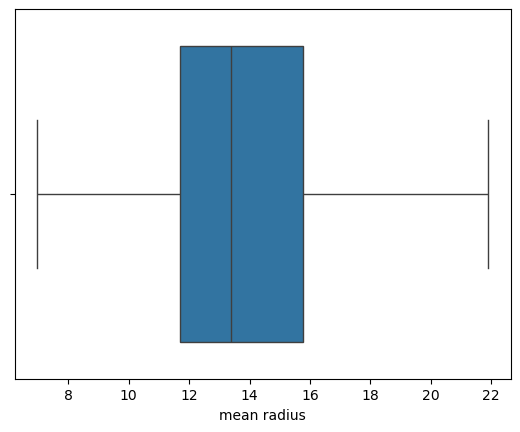

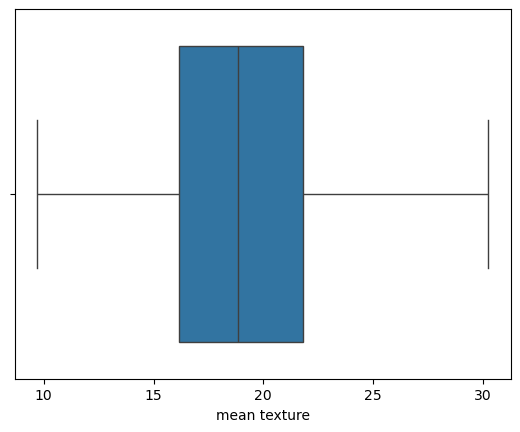

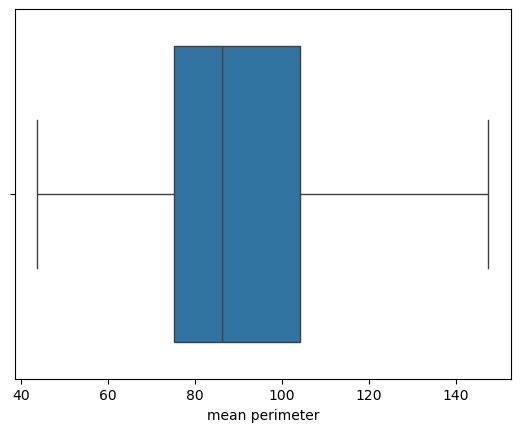

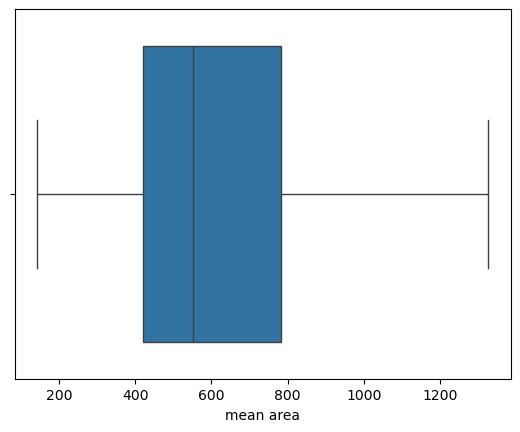

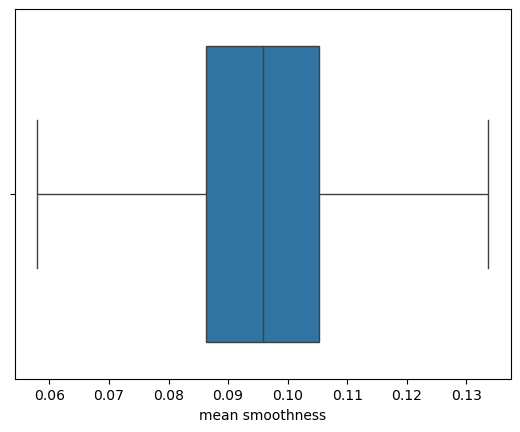

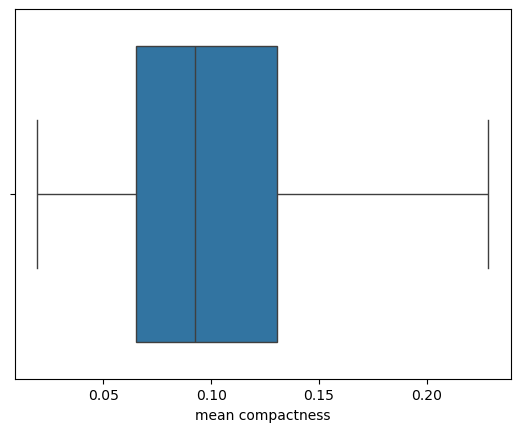

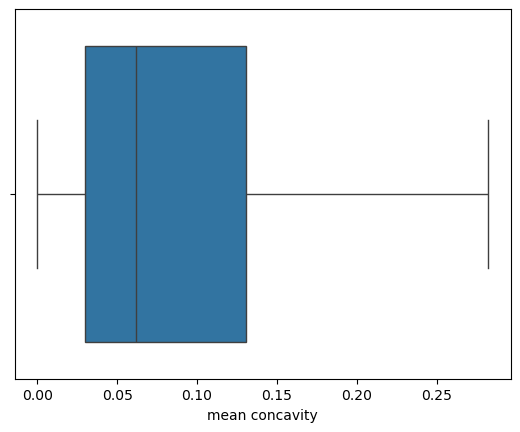

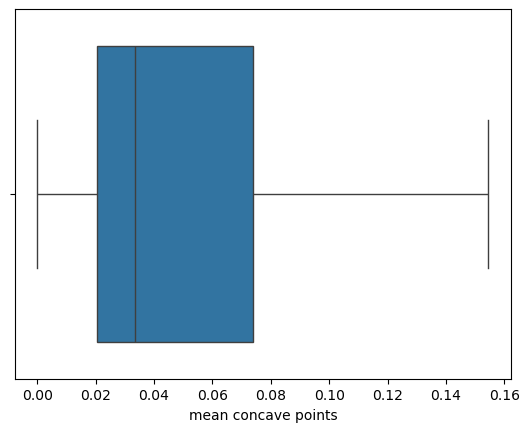

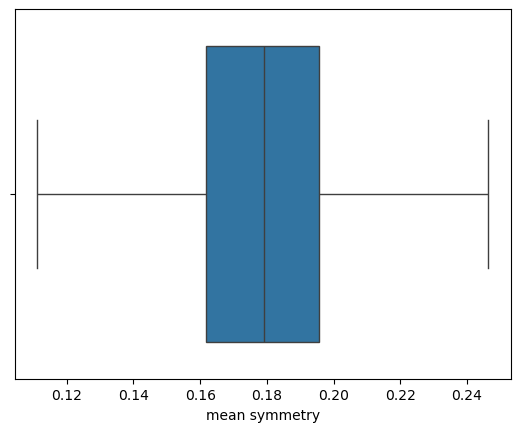

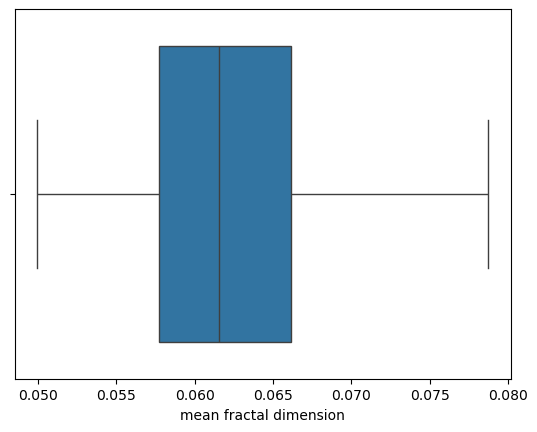

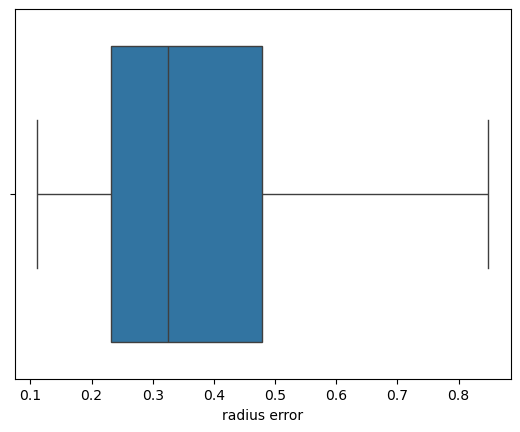

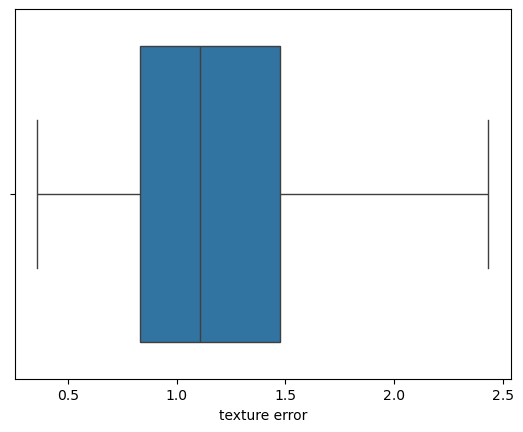

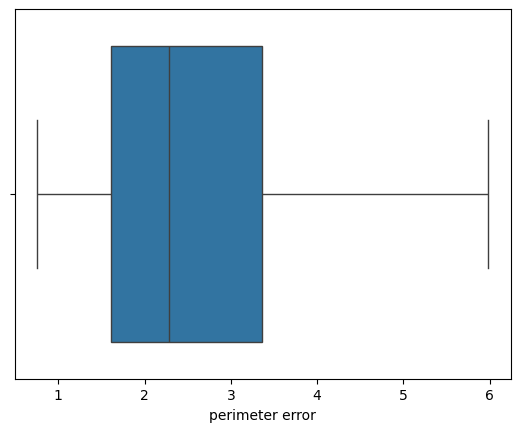

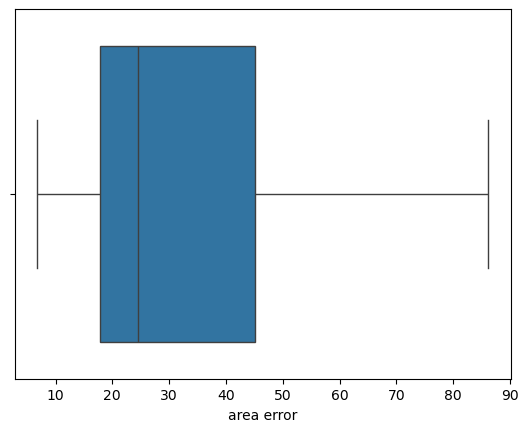

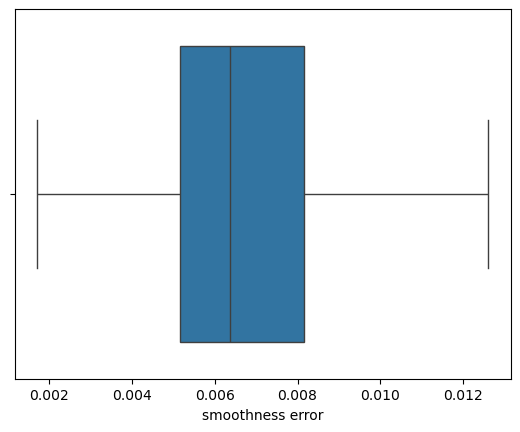

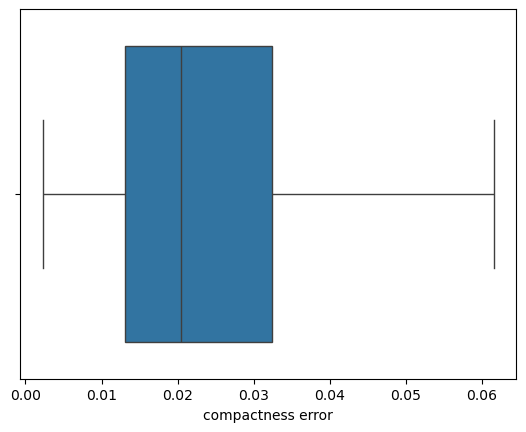

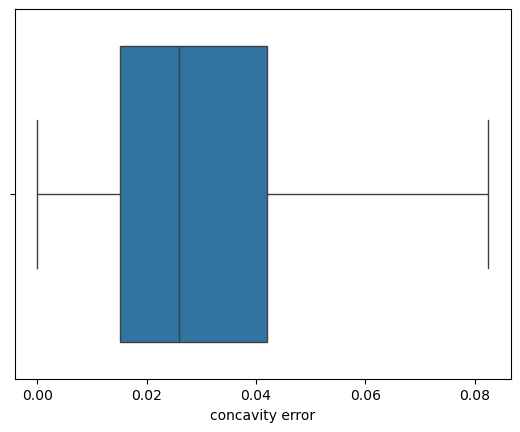

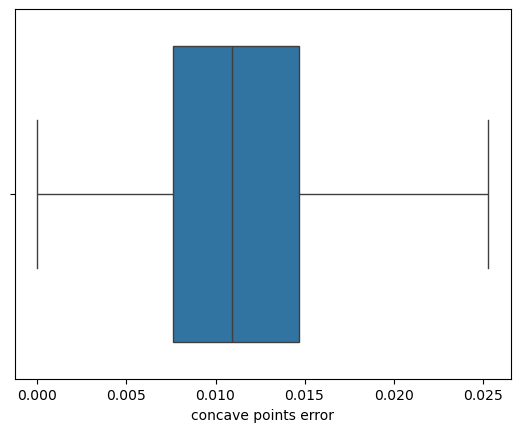

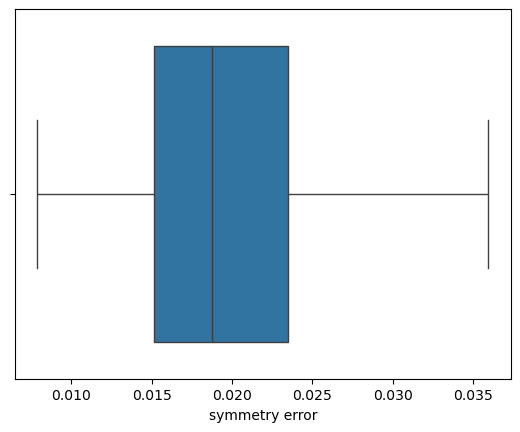

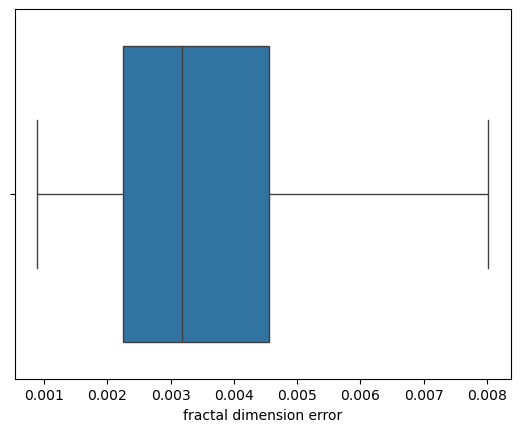

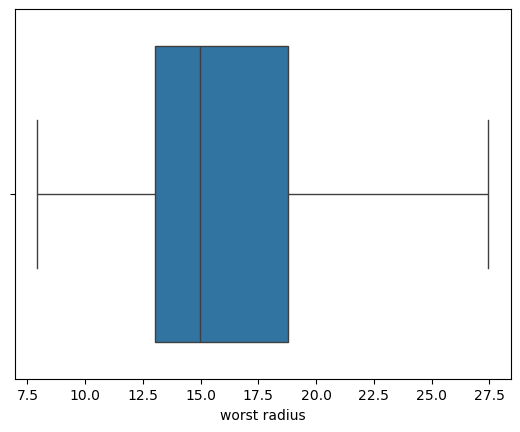

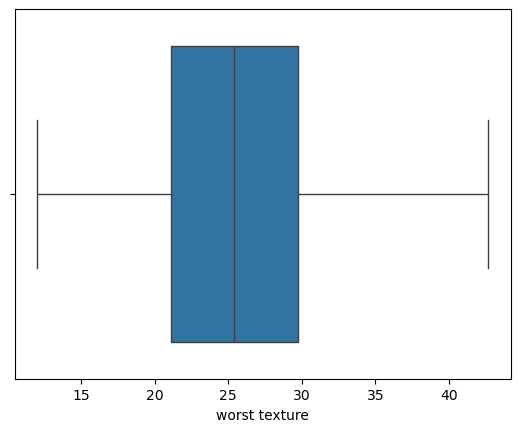

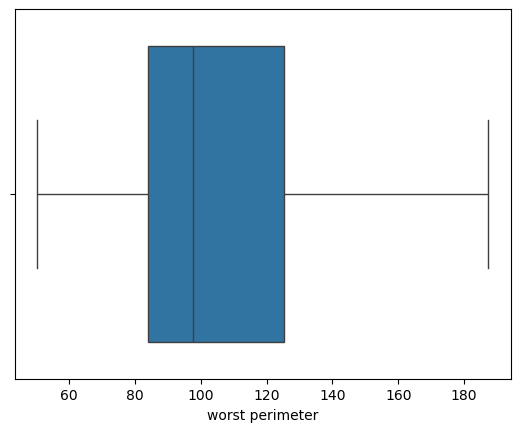

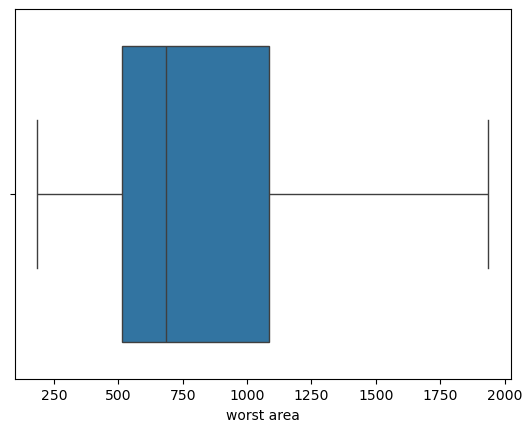

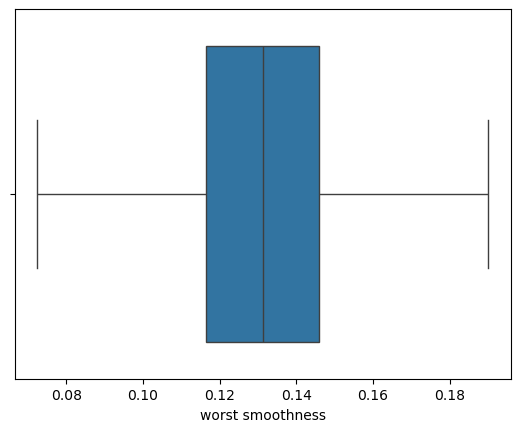

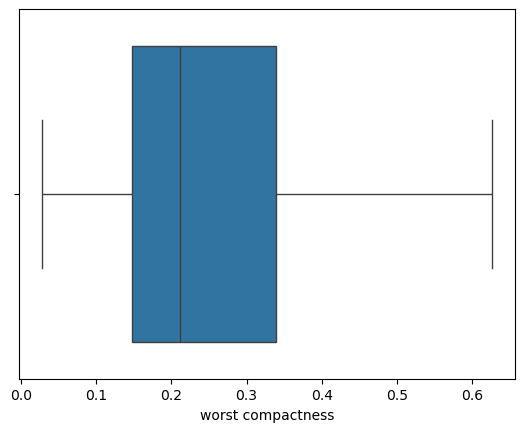

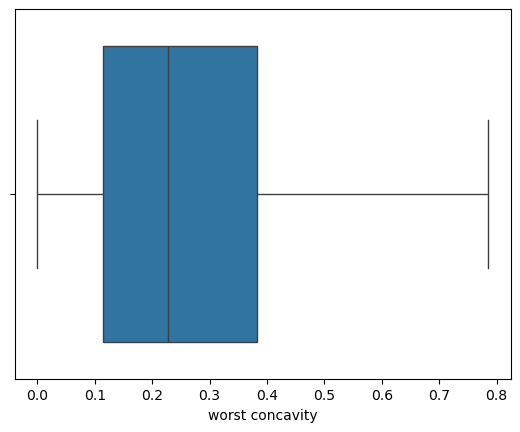

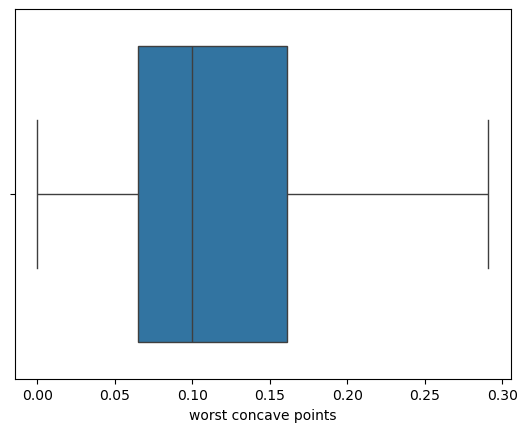

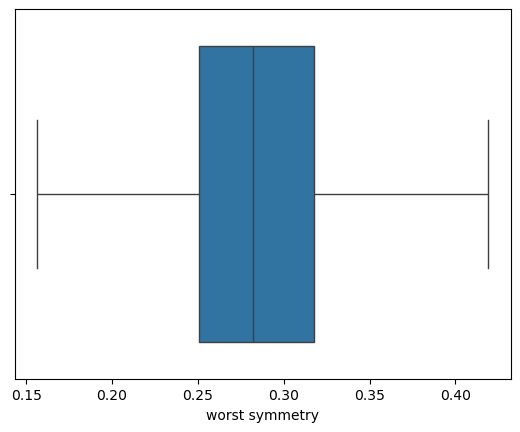

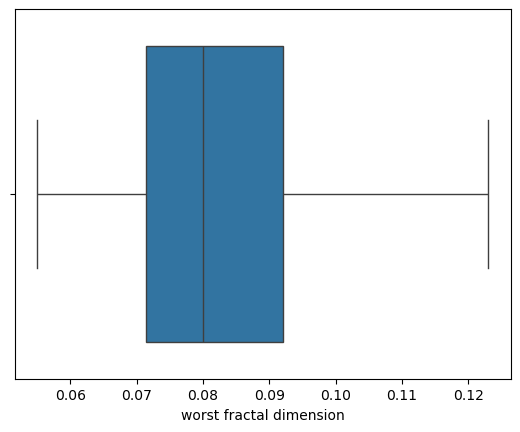

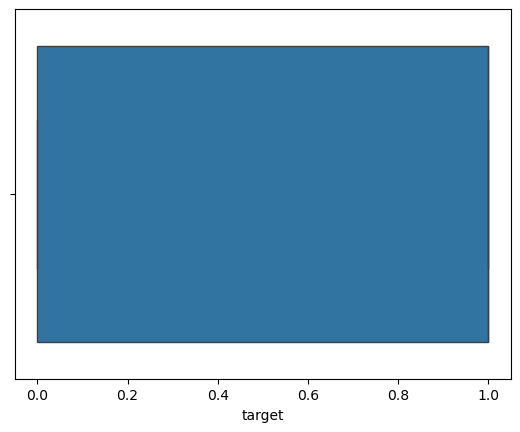

In [42]:
# Visualising outliers in each feature using boxplot 
for i in df.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [44]:
# checking skewness
df.skew()

mean radius                0.655953
mean texture               0.449700
mean perimeter             0.701081
mean area                  0.922884
mean smoothness            0.257712
mean compactness           0.826755
mean concavity             1.023859
mean concave points        1.004049
mean symmetry              0.403621
mean fractal dimension     0.682430
radius error               1.025031
texture error              0.740987
perimeter error            1.034389
area error                 1.130940
smoothness error           0.780923
compactness error          0.990285
concavity error            0.916740
concave points error       0.539571
symmetry error             0.869297
fractal dimension error    0.979344
worst radius               0.849779
worst texture              0.386858
worst perimeter            0.874870
worst area                 1.048970
worst smoothness           0.247199
worst compactness          0.915295
worst concavity            0.809174
worst concave points       0

### Exploratory Data Analysis

In [47]:
df1 = df.copy()

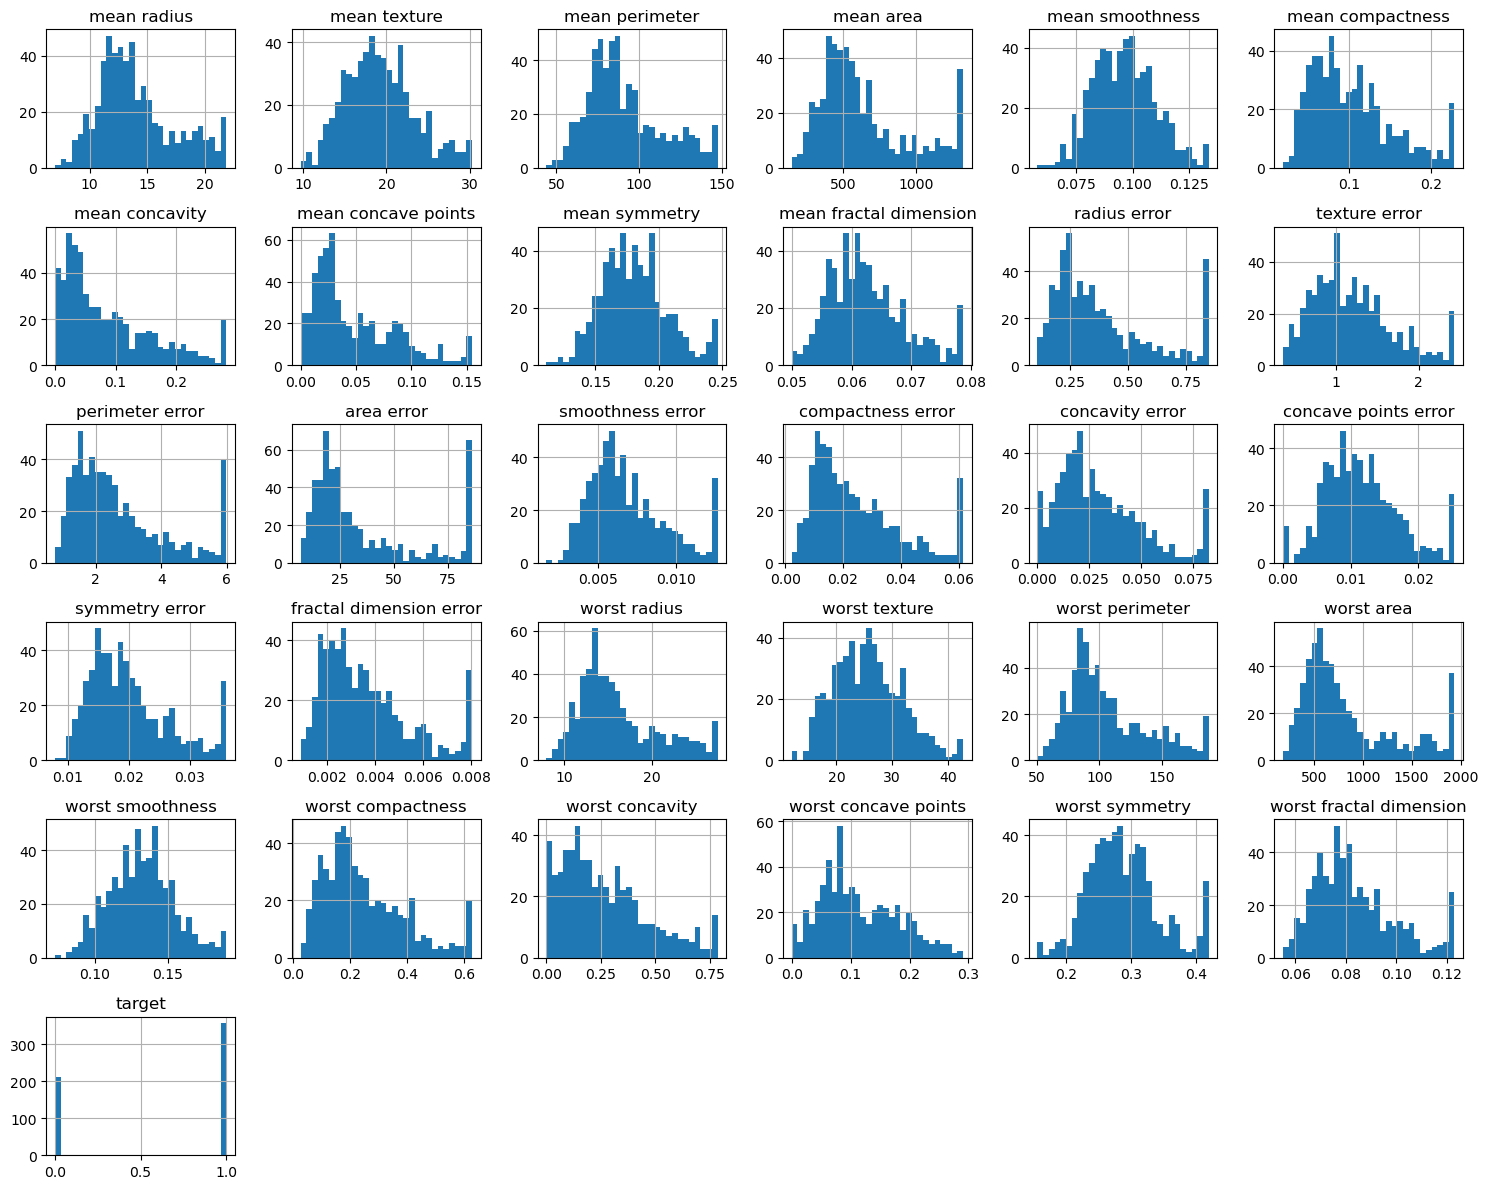

In [51]:
# Histogram
df1.hist(bins=30, figsize=(15, 12))
plt.tight_layout()
plt.show()

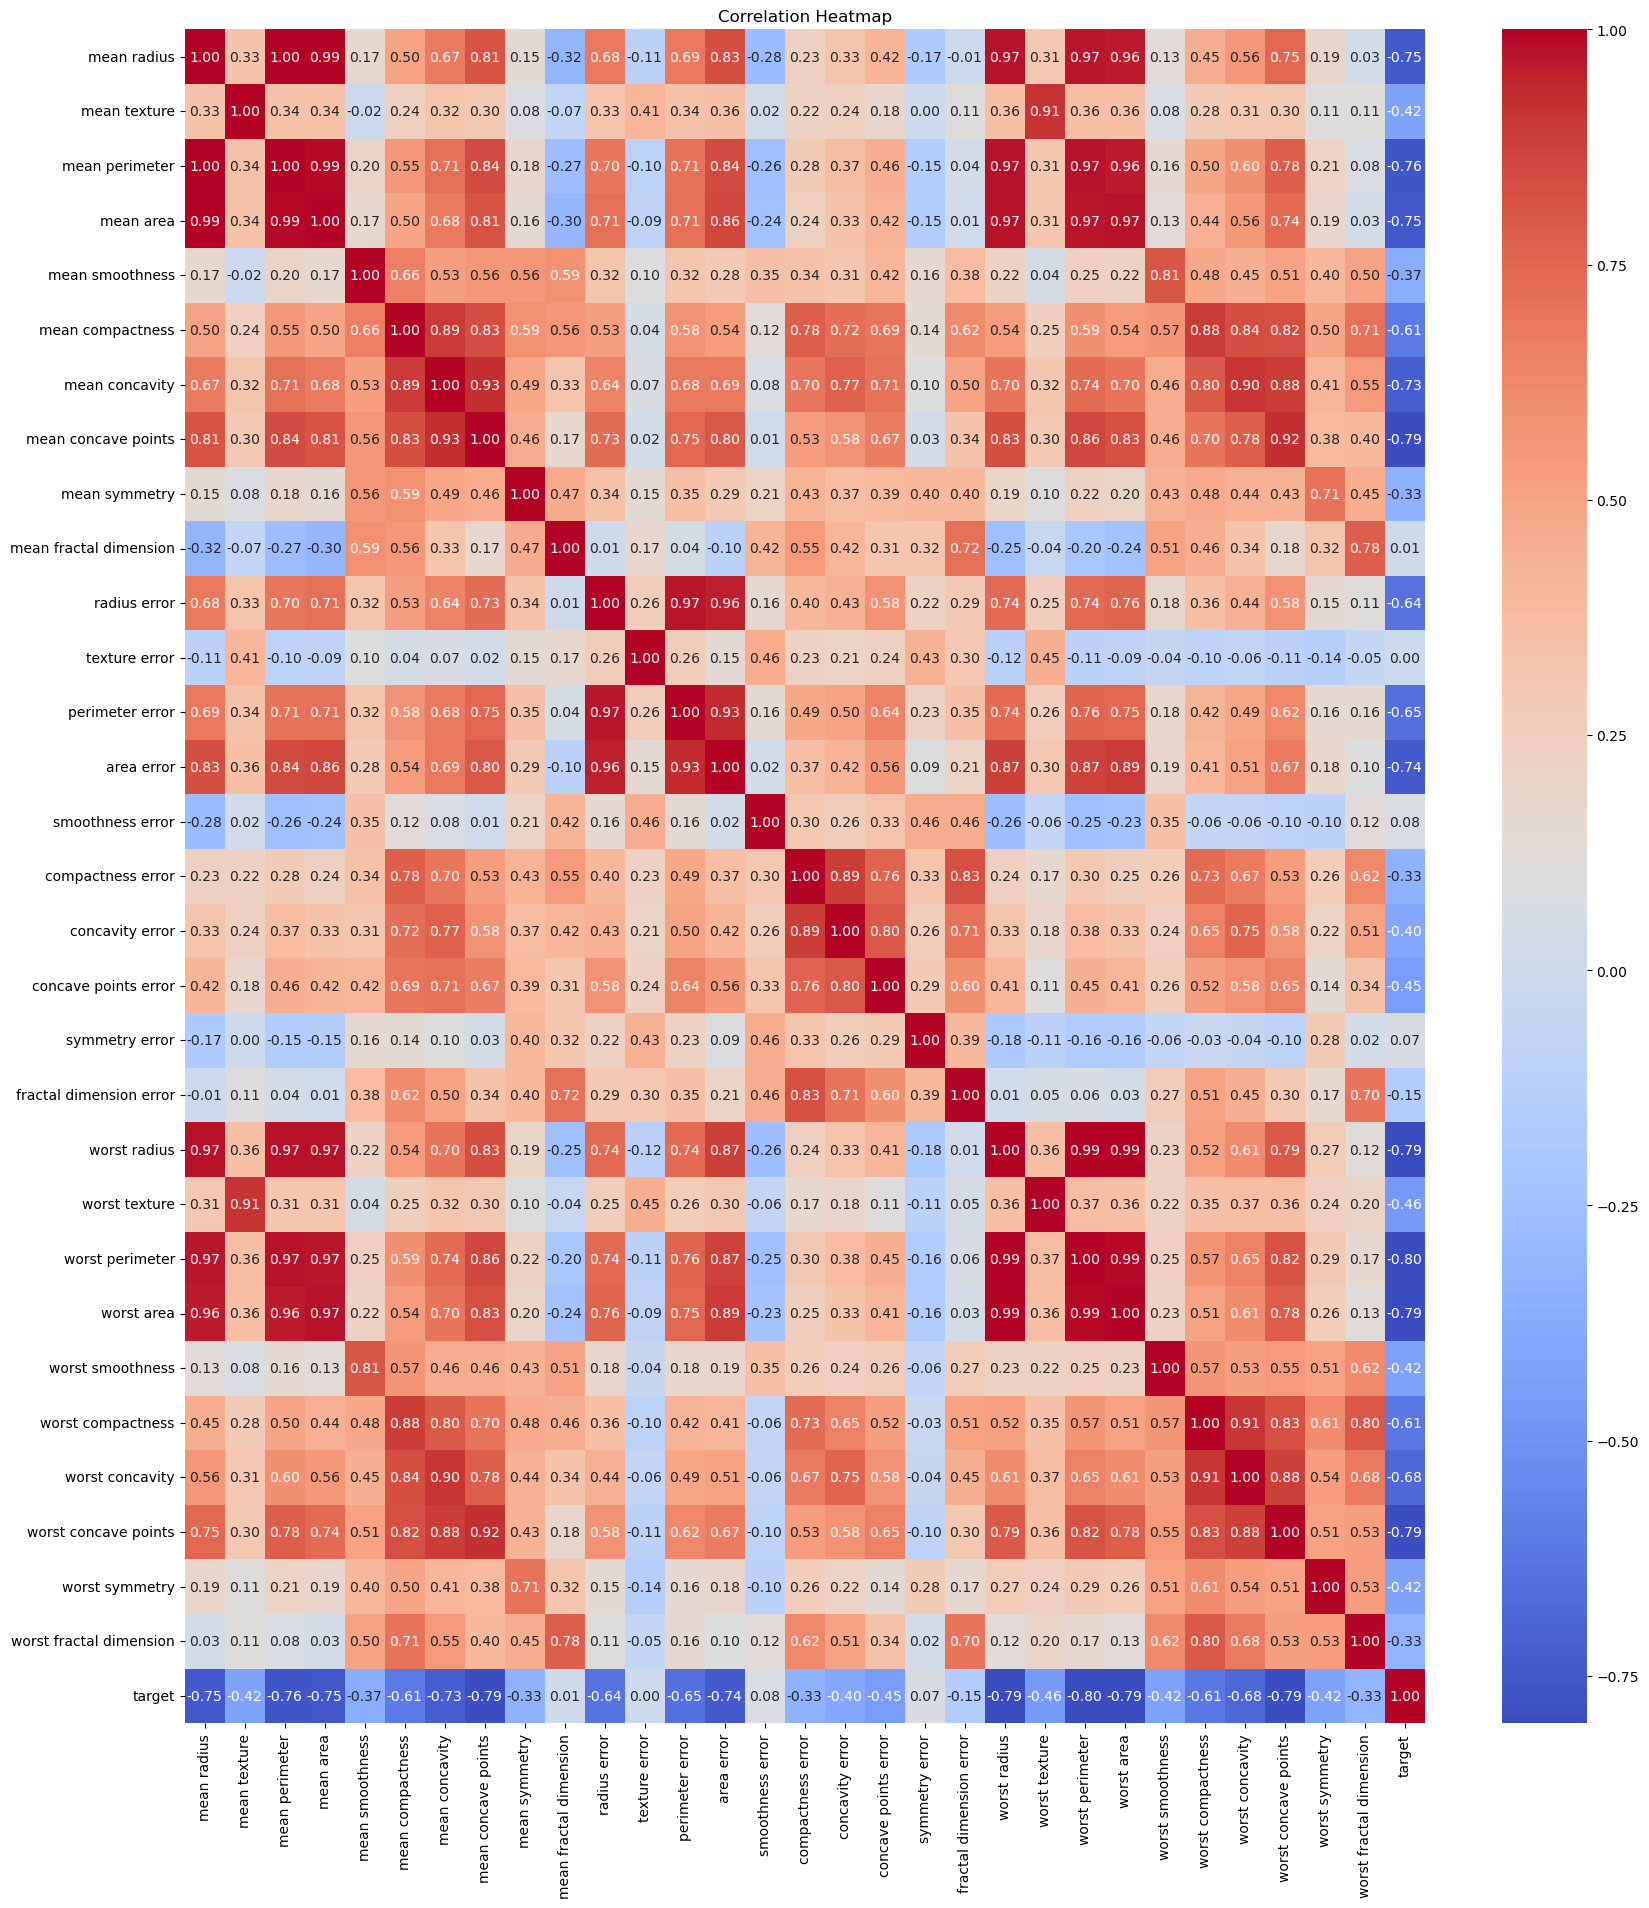

In [53]:
# Compute correlation matrix
corr_matrix = df1.corr()

# Heatmap
plt.figure(figsize=(20, 22))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

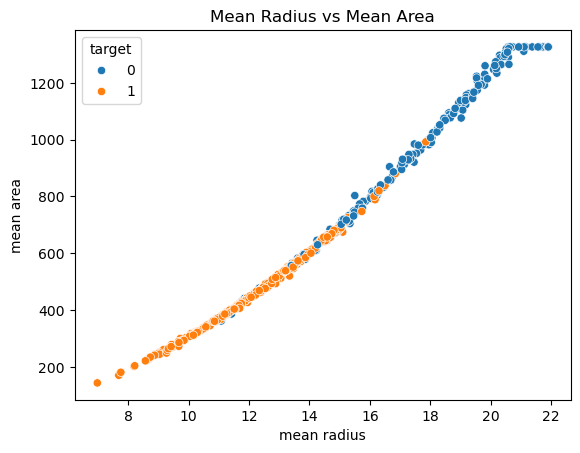

In [55]:
# Scatterplot 
sns.scatterplot(x="mean radius", y="mean area", hue="target", data=df)
plt.title("Mean Radius vs Mean Area")
plt.show()

### Feature Selection

#### Preprocessing steps and explanation
##### *Fetched basic details of the dataset with info(), describe(), shape and dtypes
##### *Checked for duplicate values and null values. The data dont have any null/ duplicated values
##### *Added boxplot for every column to visualise if there is any outliers present also added a single box plot chart combining every feature to compare the outliers
##### *Used IQR method to find the outliers of all features
##### *Used capping method further to fix the outliers
##### *Target feature doesn't have any outliers so dropped it for outlier fixing
##### *After Capping added box plot again to see the changes after outlier fixation
##### *Checked for the skew value for every feature . skew was in a good range.
##### *Drawn a histogram for every feature
##### *Added a correlation heatmap to see the relationship
##### *Added a scattershot for mean radius vs mean area

In [58]:
# Using correlation matrix

# Compute correlation matrix
corr_matrix = df1.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print(f"Features to drop due to high correlation: {to_drop}")

# Drop features
df1_reduced = df1.drop(columns=to_drop)

Features to drop due to high correlation: ['mean perimeter', 'mean area', 'mean concave points', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst concavity', 'worst concave points']


In [60]:
df1_reduced.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst compactness,worst symmetry,worst fractal dimension,target
0,17.99,10.38,0.118400,0.22862,0.28241,0.2419,0.07871,0.84865,0.9053,0.006399,0.049040,0.05373,0.01587,0.03003,0.006193,0.1622,0.62695,0.41915,0.11890,0
1,20.57,17.77,0.084740,0.07864,0.08690,0.1812,0.05667,0.54350,0.7339,0.005225,0.013080,0.01860,0.01340,0.01389,0.003532,0.1238,0.18660,0.27500,0.08902,0
2,19.69,21.25,0.109600,0.15990,0.19740,0.2069,0.05999,0.74560,0.7869,0.006150,0.040060,0.03832,0.02058,0.02250,0.004571,0.1444,0.42450,0.36130,0.08758,0
3,11.42,20.38,0.133695,0.22862,0.24140,0.2464,0.07875,0.49560,1.1560,0.009110,0.061505,0.05661,0.01867,0.03596,0.008023,0.1901,0.62695,0.41915,0.12301,0
4,20.29,14.34,0.100300,0.13280,0.19800,0.1809,0.05883,0.75720,0.7813,0.011490,0.024610,0.05688,0.01885,0.01756,0.005115,0.1374,0.20500,0.23640,0.07678,0


#### Setting independent and dependent values

In [63]:
y = df1_reduced['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [66]:
x = df1_reduced.drop('target',axis=1)
x

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst smoothness,worst compactness,worst symmetry,worst fractal dimension
0,17.99,10.38,0.118400,0.22862,0.28241,0.2419,0.07871,0.84865,0.90530,0.006399,0.049040,0.05373,0.01587,0.03003,0.006193,0.16220,0.62695,0.41915,0.11890
1,20.57,17.77,0.084740,0.07864,0.08690,0.1812,0.05667,0.54350,0.73390,0.005225,0.013080,0.01860,0.01340,0.01389,0.003532,0.12380,0.18660,0.27500,0.08902
2,19.69,21.25,0.109600,0.15990,0.19740,0.2069,0.05999,0.74560,0.78690,0.006150,0.040060,0.03832,0.02058,0.02250,0.004571,0.14440,0.42450,0.36130,0.08758
3,11.42,20.38,0.133695,0.22862,0.24140,0.2464,0.07875,0.49560,1.15600,0.009110,0.061505,0.05661,0.01867,0.03596,0.008023,0.19010,0.62695,0.41915,0.12301
4,20.29,14.34,0.100300,0.13280,0.19800,0.1809,0.05883,0.75720,0.78130,0.011490,0.024610,0.05688,0.01885,0.01756,0.005115,0.13740,0.20500,0.23640,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.111000,0.11590,0.24390,0.1726,0.05623,0.84865,1.25600,0.010300,0.028910,0.05198,0.02454,0.01114,0.004239,0.14100,0.21130,0.20600,0.07115
565,20.13,28.25,0.097800,0.10340,0.14400,0.1752,0.05533,0.76550,2.43415,0.005769,0.024230,0.03950,0.01678,0.01898,0.002498,0.11660,0.19220,0.25720,0.06637
566,16.60,28.08,0.084550,0.10230,0.09251,0.1590,0.05648,0.45640,1.07500,0.005903,0.037310,0.04730,0.01557,0.01318,0.003892,0.11390,0.30940,0.22180,0.07820
567,20.60,29.33,0.117800,0.22862,0.28241,0.2397,0.07016,0.72600,1.59500,0.006522,0.061505,0.07117,0.01664,0.02324,0.006185,0.16500,0.62695,0.40870,0.12301


#### FeatureScaling

In [69]:
minmax_scaler = MinMaxScaler()

In [71]:
#Applying scaling
x_normalized = minmax_scaler.fit_transform(x)

# converting into dataframe
x_normalized = pd.DataFrame(x_normalized)
x_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.737918,0.032627,0.798006,1.000000,1.000000,0.966716,0.998611,1.000000,0.262832,0.429967,0.789631,0.651352,0.626827,0.788803,0.743273,0.762755,1.000000,1.000000,0.939532
1,0.910852,0.392501,0.353473,0.283215,0.307709,0.517751,0.233067,0.586041,0.180188,0.322246,0.182742,0.225482,0.529268,0.213975,0.369967,0.436224,0.265667,0.451171,0.499926
2,0.851867,0.561967,0.681788,0.671573,0.698984,0.707840,0.348385,0.860205,0.205743,0.407120,0.638077,0.464541,0.812860,0.520621,0.515726,0.611395,0.662392,0.779745,0.478741
3,0.297540,0.519601,1.000000,1.000000,0.854786,1.000000,1.000000,0.521061,0.383712,0.678717,1.000000,0.686265,0.737420,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.892084,0.225469,0.558967,0.542057,0.701108,0.515533,0.308093,0.875941,0.203043,0.897096,0.377331,0.689538,0.744530,0.344683,0.592043,0.551871,0.296351,0.304207,0.319847


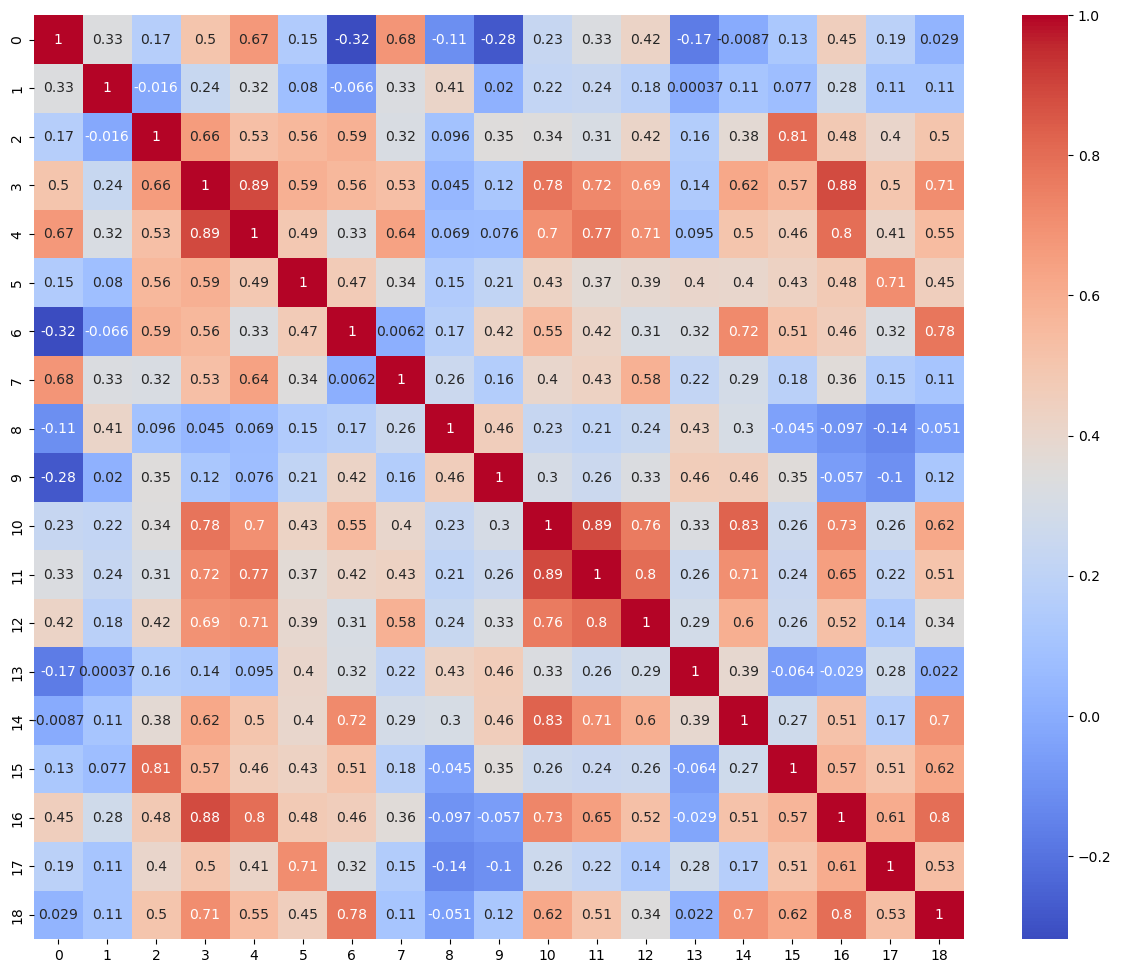

In [73]:
correlation = x_normalized.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

#### Splitting data to train and test

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.2, random_state=42)

#### Building Models

In [79]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(kernel='linear', C=1),
    "k-NN": KNeighborsClassifier(n_neighbors=5)
}


#### Logistic Regression
##### Logistic Regression is used for classification problems. It predicts the probability of a binary outcome (0 or 1, true or false) based on one or more predictor variables. It uses the logistic function (sigmoid) to map predicted values to probabilities between 0 and 1. It's commonly used in problems where you need to predict a binary response, such as spam email detection or medical diagnosis (e.g., disease present or not).

#### Decision Tree Classifier
##### A Decision Tree Classifier works by splitting the data into subsets based on the feature that provides the best separation (using metrics like Gini impurity or information gain). It creates a tree-like structure where each internal node represents a decision rule on a feature, and each leaf node represents a class label. It’s easy to understand and interpret, making it useful for classification tasks like fraud detection or customer segmentation.

#### Random Forest Classifier
##### Random Forest is an ensemble method that builds multiple decision trees during training and outputs the class that is the majority vote of the trees. It uses bootstrapping (sampling with replacement) and random feature selection to create diverse trees, which helps to reduce overfitting and improve accuracy compared to a single decision tree. It's widely used for tasks like predicting customer behavior or disease diagnosis.

#### Support Vector Machine (SVM)
#####  SVM works by finding the hyperplane that best separates the data into classes. It maximizes the margin (the distance between the closest points of each class) to ensure better generalization. SVM is effective for high-dimensional spaces, making it useful in applications like image recognition or text classification. It can handle both linear and non-linear classification through the use of kernels.

#### k-Nearest Neighbors (k-NN)
##### k-NN is a simple, instance-based learning algorithm. For classification, it assigns a class label to a data point based on the majority class of its 'k' nearest neighbors (using a distance metric like Euclidean distance). The value of 'k' is chosen beforehand. It’s effective in cases where the decision boundary is highly irregular, like handwriting recognition, but can become computationally expensive with large datasets.

Training Logistic Regression...
Logistic Regression Accuracy: 0.9825
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Logistic Regression Confusion Matrix:
[[41  2]
 [ 0 71]]



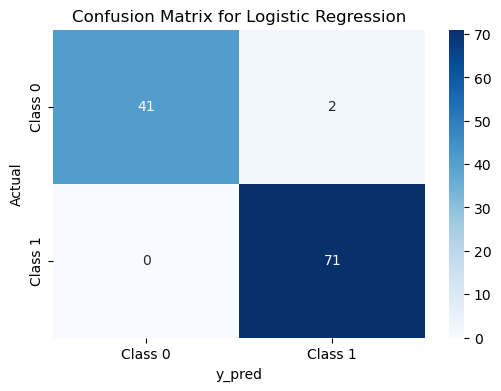

Training Decision Tree...
Decision Tree Accuracy: 0.9298
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        43
           1       0.94      0.94      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114


Decision Tree Confusion Matrix:
[[39  4]
 [ 4 67]]



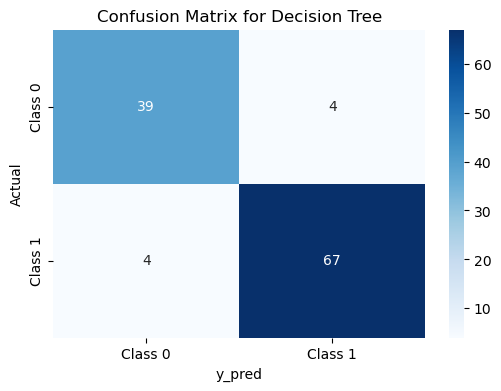

Training Random Forest...
Random Forest Accuracy: 0.9649
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114


Random Forest Confusion Matrix:
[[41  2]
 [ 2 69]]



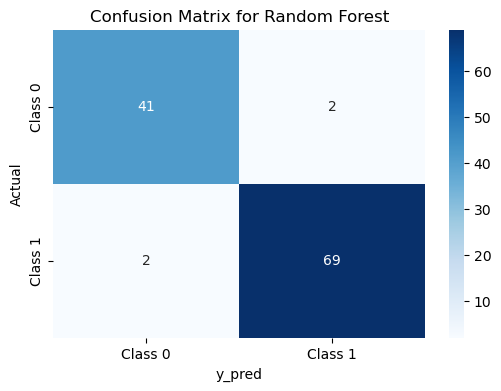

Training SVM...
SVM Accuracy: 0.9825
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


SVM Confusion Matrix:
[[42  1]
 [ 1 70]]



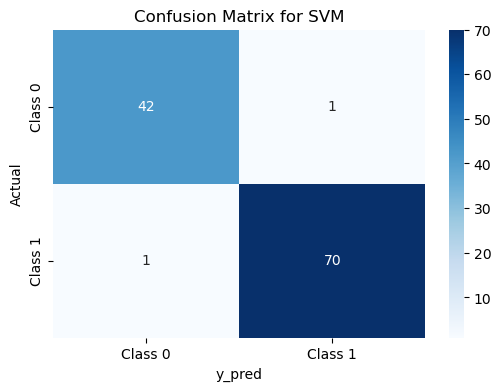

Training k-NN...
k-NN Accuracy: 0.9474
k-NN Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.97      0.94      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114


k-NN Confusion Matrix:
[[41  2]
 [ 4 67]]



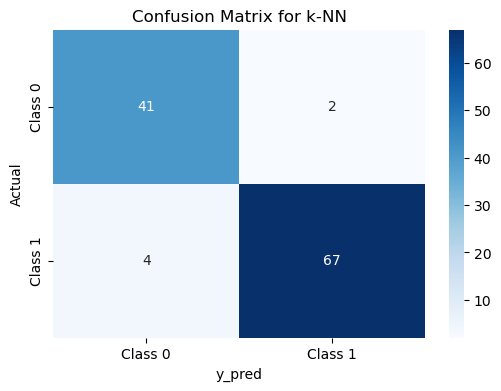

In [91]:
# Train and evaluate each model
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(x_train, y_train)  # Train the model
    y_pred = model.predict(x_test)  # Make predictions
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} Classification Report:\n{classification_report(y_test, y_pred)}\n")

     # Generate Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"{model_name} Confusion Matrix:\n{cm}\n")
    
    # Visualize Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.ylabel("Actual")
    plt.xlabel("y_pred")
    plt.show()

#### Model evaluation

In [94]:
# Comparison of results
print("Model Accuracy Comparison:")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")

Model Accuracy Comparison:
Logistic Regression: 0.9825
Decision Tree: 0.9298
Random Forest: 0.9649
SVM: 0.9825
k-NN: 0.9474


In [96]:
## finding best model
# Get the best model from sorted_results
best_model_name = max(results, key=results.get)
best_model_accuracy = results[best_model_name]

print(f"\nThe Best Model is: {best_model_name}")
print(f"Accuracy: {best_model_accuracy:.4f}")


The Best Model is: Logistic Regression
Accuracy: 0.9825


In [98]:
# Get the worst model from results
worst_model_name = min(results, key=results.get)
worst_model_accuracy = results[worst_model_name]

print(f"The Worst Model is: {worst_model_name}")
print(f"Accuracy: {worst_model_accuracy:.4f}")

The Worst Model is: Decision Tree
Accuracy: 0.9298


#### Hyperparameter Tuning with GridSearchCV

In [103]:
# Define the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],         # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet'], # Regularization type
    'solver': ['liblinear', 'saga']        # Solver choice
}

In [105]:
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)
grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....................C=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, sol

In [107]:
# Evaluate the best model on the test set
best_logreg_model = grid_search.best_estimator_
test_accuracy = best_logreg_model.score(x_test, y_test)
print("Test Accuracy of Best Logistic Regression Model:", test_accuracy)

Test Accuracy of Best Logistic Regression Model: 0.9824561403508771


#### Saving the model

In [110]:
# Save the tuned logistic regression model
joblib.dump(best_logreg_model, 'classification_lr_model(breast_cancer).joblib')
print("Model saved as classification_lr_model(breast_cancer).joblib.")

Model saved as classification_lr_model(breast_cancer).joblib.
